In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}
# %matplotlib notebook

import logging
logging.basicConfig(level=logging.INFO)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

import superscreen as sc

from small_susc import small_susc

In [2]:
def ibm_field_coil(interp_points=None):
    squid = small_susc()
    
    return sc.Device(
        "ibm_field_coil",
        layers=[squid.layers["BE"]],
        films=[squid.films["fc"]],
        holes=[squid.holes["fc_center"]],
        abstract_regions=[squid.abstract_regions["bounding_box"]],
        length_units=squid.length_units,
    )

def ibm_without_field_coil():
    squid = small_susc()
    
    layers = squid.layers
    _ = layers.pop("BE")
    films = squid.films
    _ = films.pop("fc")
    _ = films.pop("pl_shield2")
    # _ = films.pop("fc_shield", None)
    holes = squid.holes
    _ = holes.pop("fc_center")
    
    return sc.Device(
        "ibm_without_field_coil",
        layers=layers,
        films=films,
        holes=holes,
        abstract_regions=squid.abstract_regions,
        length_units=squid.length_units,
    )

In [3]:
squid = small_susc()

layers = squid.layers
layers["sample_layer"] = sc.Layer("sample_layer", Lambda=0.08, z0=0.0)

sample_points = np.array(
    [
        [-1.5, -3.15],
        [-1.5,  1.50],
        [2.50,  1.50],
        [2.50, -3.15],
    ]
)

films = squid.films
films["sample"] = sc.Polygon(
    "sample",
    layer="sample_layer",
    points=sample_points,
)

squid.layers = layers
squid.films = films

In [4]:
squid.make_mesh(min_triangles=10000, optimesh_steps=200)

INFO:superscreen.device:Generating mesh...
INFO:superscreen.device:Optimizing mesh with 10092 triangles.
INFO:superscreen.device:Finished generating mesh with 5173 points and 10092 triangles.
INFO:superscreen.device:Calculating weight matrix.
INFO:superscreen.device:Calculating Laplace operator.
INFO:superscreen.device:Calculating kernel matrix.


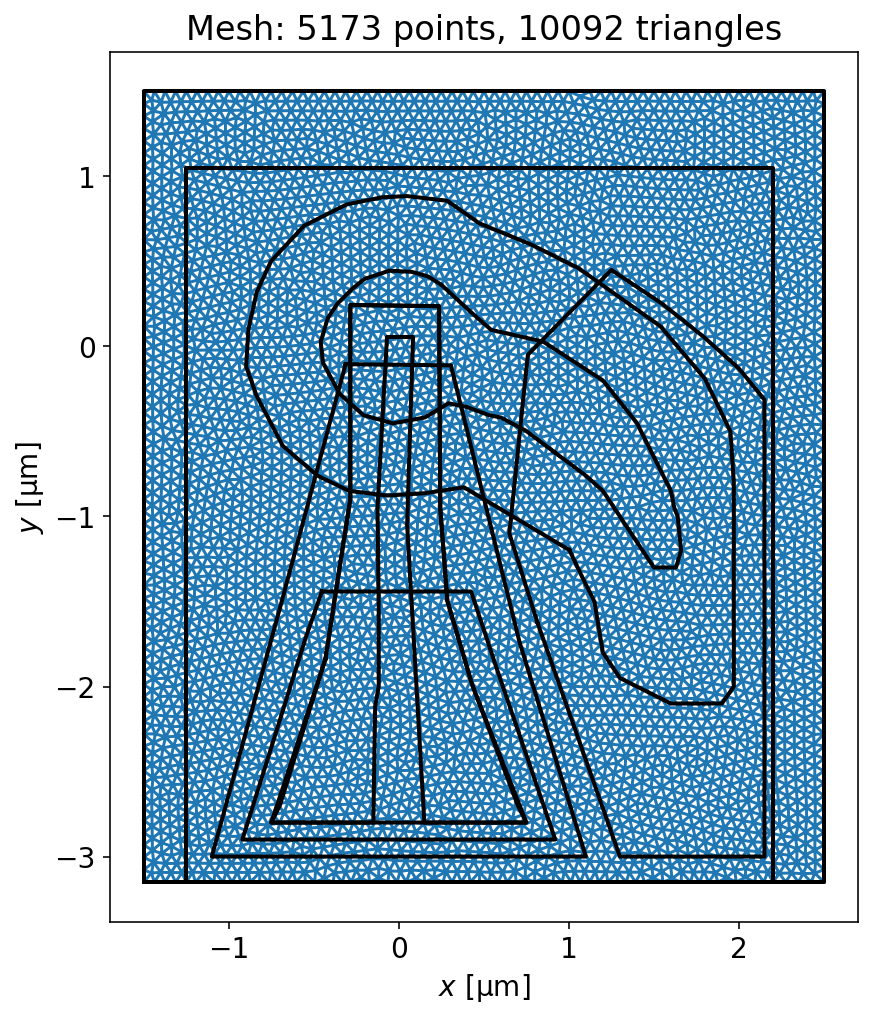

In [5]:
ax = squid.plot_mesh()
ax = squid.plot_polygons(ax=ax, color='k', lw=2, legend=False)
_ = ax.set_title(
    f"Mesh: {squid.points.shape[0]} points, "
    f"{squid.triangles.shape[0]} triangles"
)
ax.figure.set_size_inches(8,8)

In [6]:
# field_coil = ibm_field_coil()
# field_coil.make_mesh(min_triangles=10000, optimesh_steps=200)

In [7]:
# ax = field_coil.plot_mesh()
# ax = field_coil.plot_polygons(ax=ax, color='k', lw=2, legend=False)
# _ = ax.set_title(
#     f"Mesh: {field_coil.points.shape[0]} points, "
#     f"{field_coil.triangles.shape[0]} triangles"
# )
# ax.figure.set_size_inches(8,8)

In [8]:
# applied_field = sc.sources.ConstantField(0.0)

# circulating_currents = {
#     "fc_center": "1 mA"
# }

# field_coil.layers["BE"]._Lambda = 10

# solutions = sc.solve(
#     device=field_coil,
#     applied_field=applied_field,
#     circulating_currents=circulating_currents,
#     field_units="Phi_0/um**2",
#     current_units="uA",
#     iterations=1,
#     coupled=False,
# )
# field_coil_solution = solutions[-1]

In [9]:
# fig, axes = sc.plot_currents(
#     field_coil_solution,
#     units="mA/um",
#     figsize=(6,6),
# )

In [10]:
# field_units = "mT"

# fc_fields = {}
# for layer in squid.layers_list:
#     fc_fields[layer.z0] = field_coil_solution.field_at_position(
#         squid.points,
#         zs=layer.z0,
#         units=field_units,
#         with_units=False,
#     )

# def field_coil_field(x, y, z):
#     return fc_fields[z]

In [11]:
field_units = "mT"

solutions = []

# applied_field = field_coil_field

applied_field = sc.sources.ConstantField(0)

circulating_currents = {
    "fc_center": "1 mA",
}

solutions = sc.solve(
    device=squid,
    applied_field=applied_field,
    circulating_currents=circulating_currents,
    field_units=field_units,
    current_units="uA",
    iterations=11,
    coupled=True,
)

INFO:superscreen.brandt:Calculating W2 response to applied field.
INFO:superscreen.brandt:Calculating W1 response to applied field.
INFO:superscreen.brandt:Calculating BE response to applied field.
INFO:superscreen.brandt:Calculating sample_layer response to applied field.
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (1/11).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (1/11).
INFO:superscreen.brandt:Calculating screening field at W2 from sample_layer (1/11).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (1/11).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (1/11).
INFO:superscreen.brandt:Calculating screening field at W1 from sample_layer (1/11).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (1/11).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (1/11).
INFO:superscreen.brandt:Calculating screening field at BE from sample_layer (1/11).
INFO:superscreen.brandt:Calcul

INFO:superscreen.brandt:Calculating screening field at W2 from W1 (6/11).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (6/11).
INFO:superscreen.brandt:Calculating screening field at W2 from sample_layer (6/11).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (6/11).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (6/11).
INFO:superscreen.brandt:Calculating screening field at W1 from sample_layer (6/11).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (6/11).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (6/11).
INFO:superscreen.brandt:Calculating screening field at BE from sample_layer (6/11).
INFO:superscreen.brandt:Calculating screening field at sample_layer from W2 (6/11).
INFO:superscreen.brandt:Calculating screening field at sample_layer from W1 (6/11).
INFO:superscreen.brandt:Calculating screening field at sample_layer from BE (6/11).
INFO:superscreen.brandt:Calculating W2 response to a

INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (11/11).
INFO:superscreen.brandt:Calculating sample_layer response to applied field and screening field from other layers (11/11).


In [12]:
records = []
for s in solutions:
    records.append(s.polygon_flux(units="Phi_0", with_units=False))
df = pd.DataFrame.from_records(records)
df.index.name = "Iteration"

In [13]:
df

,fc,pl_shield2,fc_shield,pl,pl_shield,sample,fc_center,bounding_box,pl_hull
Iteration,,,,,,,,,
0,2.592158,0.000000,0.000000,0.000000,0.000000,0.000000,2.283478,0.000000,0.000000
1,2.592158,0.000000,0.065969,0.031692,0.010383,0.075124,2.283478,0.418294,0.066783
2,2.463771,0.001361,0.047260,0.023675,0.002708,0.067453,2.190841,0.249517,0.046898
3,2.480507,0.000553,0.052176,0.023440,0.001472,0.068958,2.202337,0.263769,0.046165
4,2.476227,0.000920,0.051033,0.023731,0.001610,0.068664,2.199462,0.261116,0.047130
5,2.477152,0.000749,0.051365,0.023520,0.001309,0.068673,2.200070,0.261087,0.046469
6,2.476897,0.000824,0.051276,0.023622,0.001392,0.068696,2.199902,0.261269,0.046795
7,2.476961,0.000790,0.051304,0.023573,0.001332,0.068681,2.199944,0.261118,0.046639
8,2.476940,0.000805,0.051294,0.023595,0.001352,0.068690,2.199930,0.261190,0.046710


<ipython-input-14-b4af003bd49b>:5: RuntimeWarning: divide by zero encountered in true_divide
  ys = np.abs(np.diff(ys))[1:] / np.abs(ys)[1:-1]


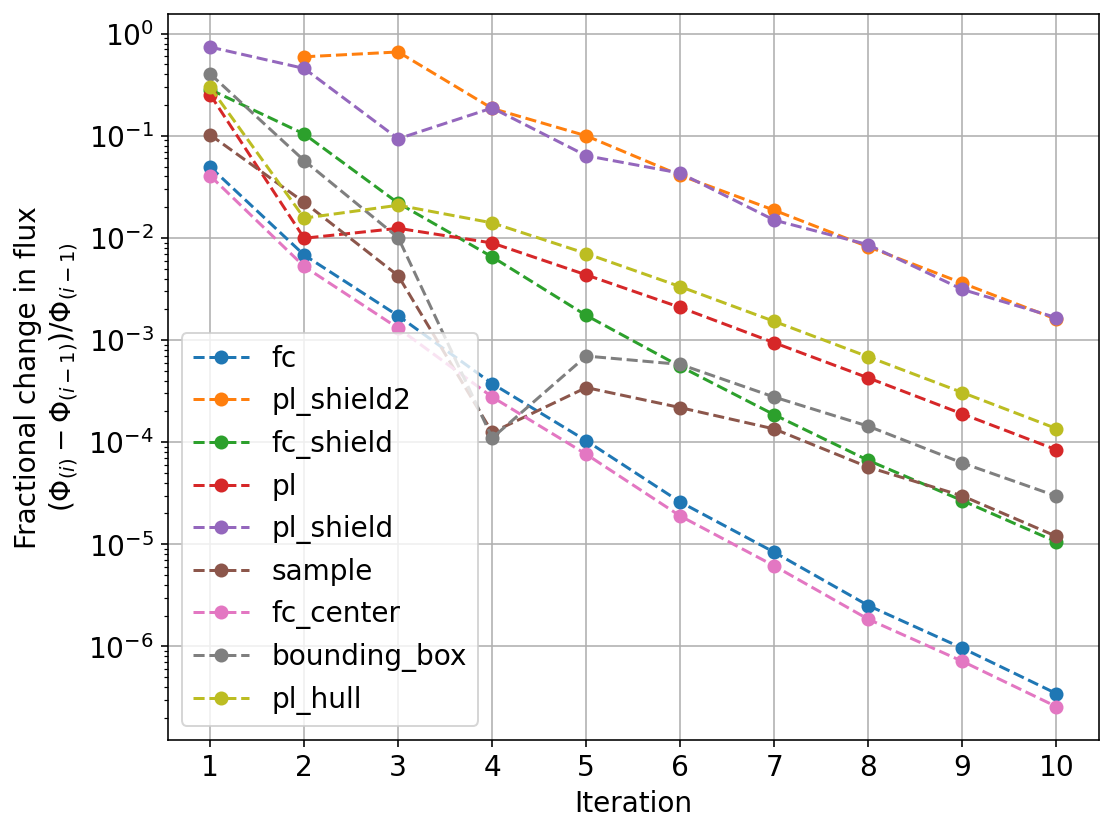

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.grid(True)
for col in df.columns:
    ys = df[col].values
    ys = np.abs(np.diff(ys))[1:] / np.abs(ys)[1:-1]
    ax.plot(np.arange(len(ys)) + 1, ys, 'o--', label=col)
ax.set_ylabel("Fractional change in flux\n$(\\Phi_{(i)} -\\Phi_{(i-1)}) / \\Phi_{(i-1)}$", fontsize=14)
ax.set_xlabel("Iteration", fontsize=14)
ax.set_xticks(np.arange(len(ys)) + 1)
ax.set_yscale("log")
ax.legend(loc=0)
fig.tight_layout()

In [15]:
1e3 * df["pl_hull"] - 71

Iteration
0    -71.000000
1     -4.217500
2    -24.101850
3    -24.834631
4    -23.870325
5    -24.531230
6    -24.204728
7    -24.360531
8    -24.289615
9    -24.321575
10   -24.307293
11   -24.313634
Name: pl_hull, dtype: float64

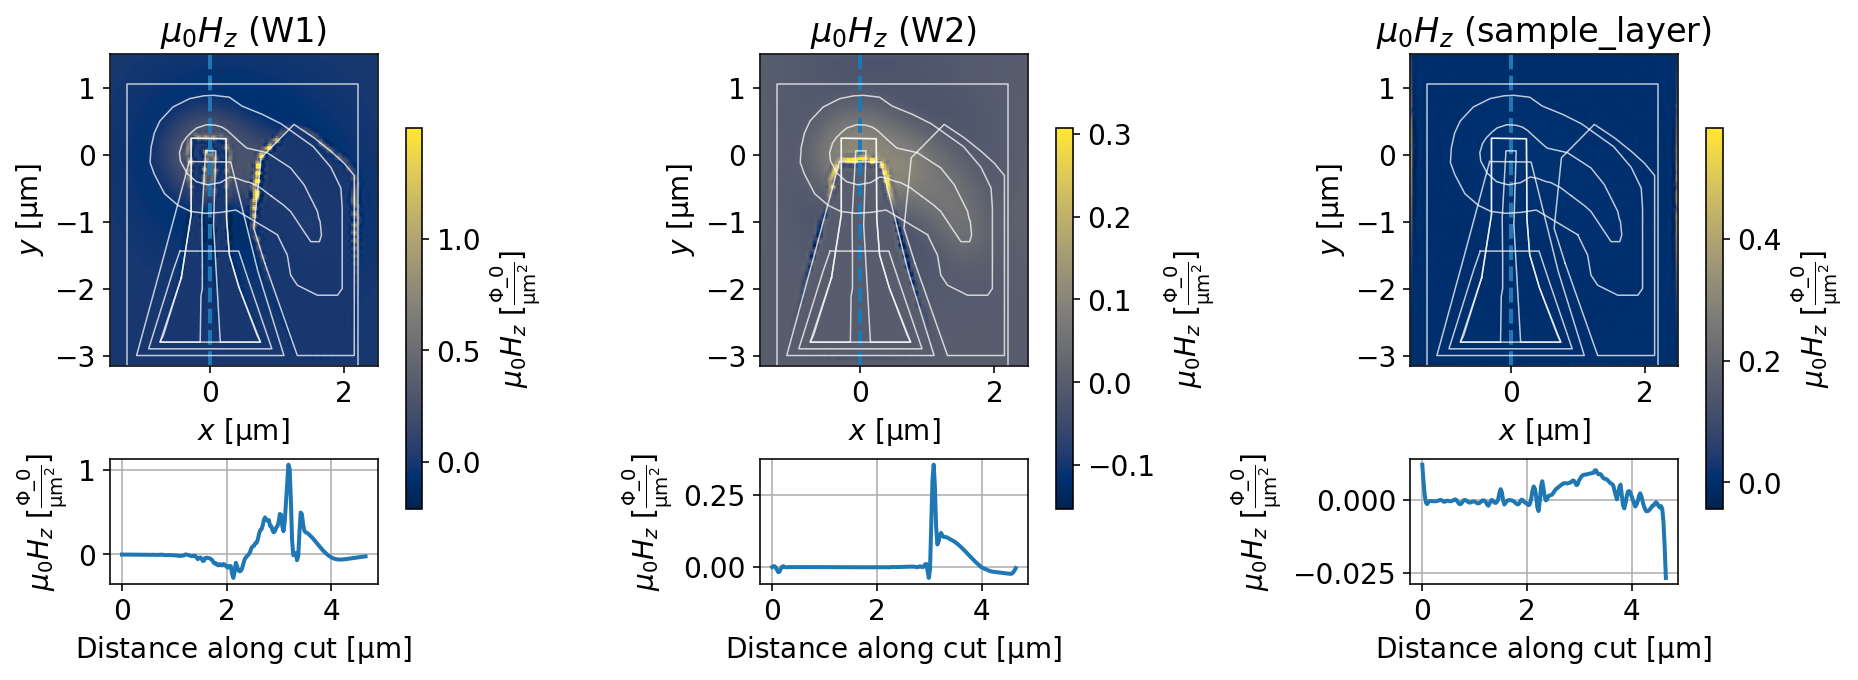

In [16]:
for solution in solutions[-1:]:
    fig, axes = sc.plot_fields(
        solution,
        dataset="fields",
        layers=["W1", "W2", "sample_layer"],
        figsize=(13,5),
        units="Phi_0/um**2",
        cross_section_xs=0,
        cross_section_angle=0,
#         vmin=-0.2, vmax=0.2,
        auto_range_cutoff=0.1,
    )
    for ax in axes:
        squid.plot_polygons(ax=ax, legend=False, color='w', lw=0.75, alpha=0.75)
        # field_coil.plot_polygons(ax=ax, legend=False, color='w', lw=0.75, alpha=0.75)
        # ax.set_ylim(-1, 1)

In [17]:
# for solution in solutions[:1]:
#     fig, axes = sc.plot_currents(
#         solution,
#         figsize=(15,6),
#         max_cols=4,
#         streamplot=False,
#         units="mA/um",
#         cross_section_xs=0,
#         cross_section_angle=0,
#     )
#     for ax in axes:
#         squid.plot_polygons(ax=ax, legend=False, color='w', lw=0.75, alpha=0.75)
#         #field_coil.plot_polygons(ax=ax, legend=False, color='w', lw=0.75, alpha=0.75)

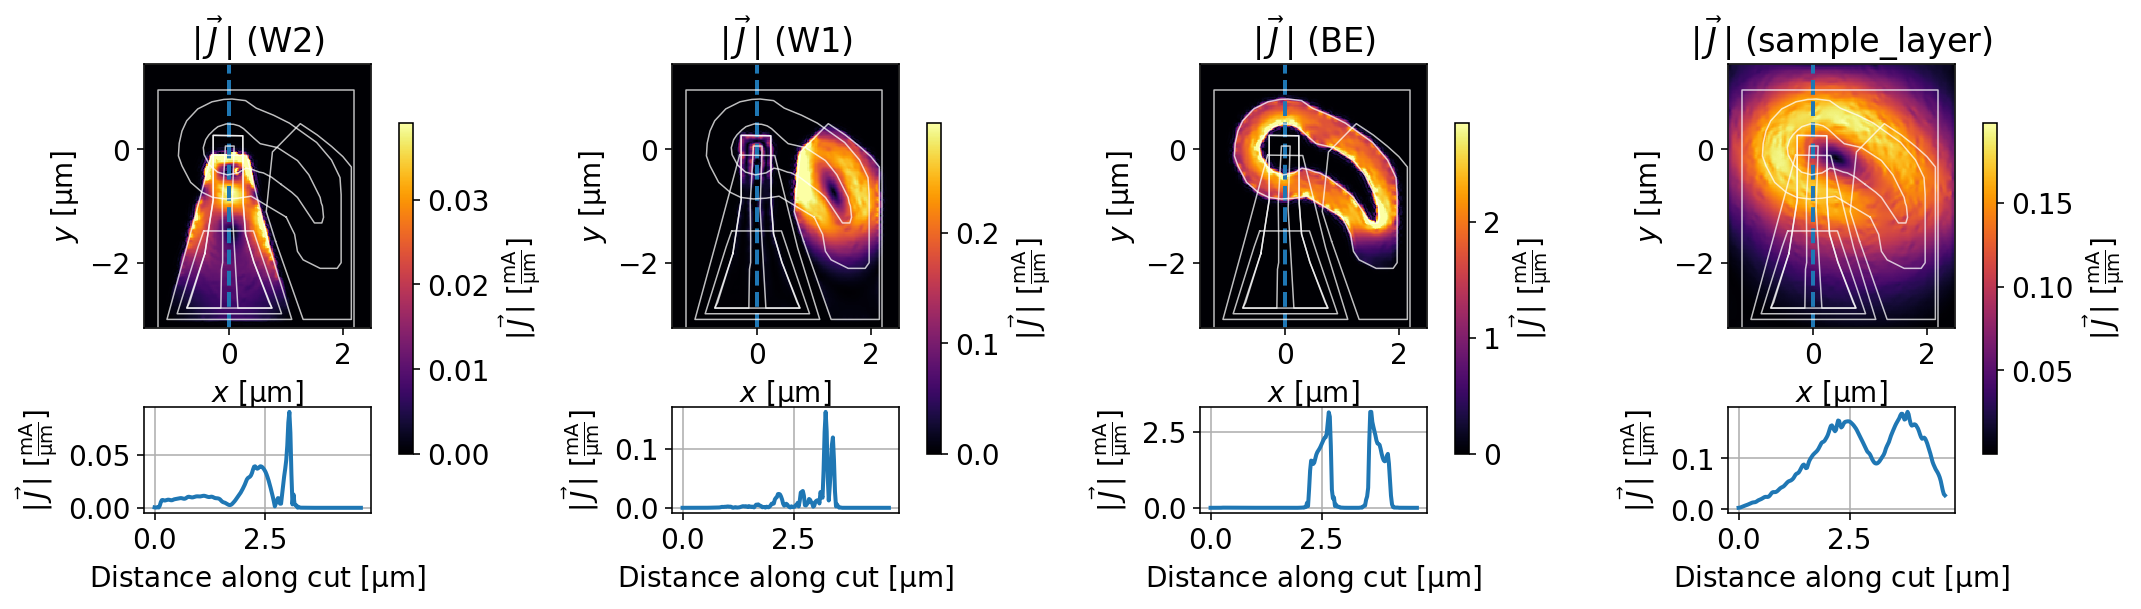

In [24]:
for solution in solutions[-1:]:
    fig, axes = sc.plot_currents(
        solution,
        figsize=(15, 4.5),
        max_cols=4,
        streamplot=False,
        units="mA/um",
        cross_section_xs=0,
        auto_range_cutoff=(0, 99),
        cross_section_angle=0,
    )
    for ax in axes:
        squid.plot_polygons(ax=ax, legend=False, color='w', lw=0.75, alpha=0.75)
        #field_coil.plot_polygons(ax=ax, legend=False, color='w', lw=0.75, alpha=0.75)